## pandas

[Documentation](https://pandas.pydata.org/pandas-docs/stable/)

Package for Data Analsys, provides very usefull 2d Table object: `pd.DataFrame` and lots of methods on it

This is only a very short introduction

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Make plots appear directly in the notebook and bigger 

%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 10
plt.rcParams['font.size'] = 16

### The titanic dataset

In [2]:
df = pd.read_csv('../data/titanic.csv')

In [3]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Asking questions to the data

Pandas is great for answering simple and more complex questions to the dataframe

How many valid entries (not NaN) are there in each column?

In [4]:
df.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

Ok, let's get rid of the columns with lots of missing data

In [5]:
# axis=1: drop columns
# inplace: edit the df inplace, if False, returns a copy
df.drop(['cabin', 'boat', 'body', 'home.dest'], axis=1, inplace=True) 

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


Let's get a quick overview over the numerical data

In [11]:
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


pandas has wrappers for plotting using matplotlib

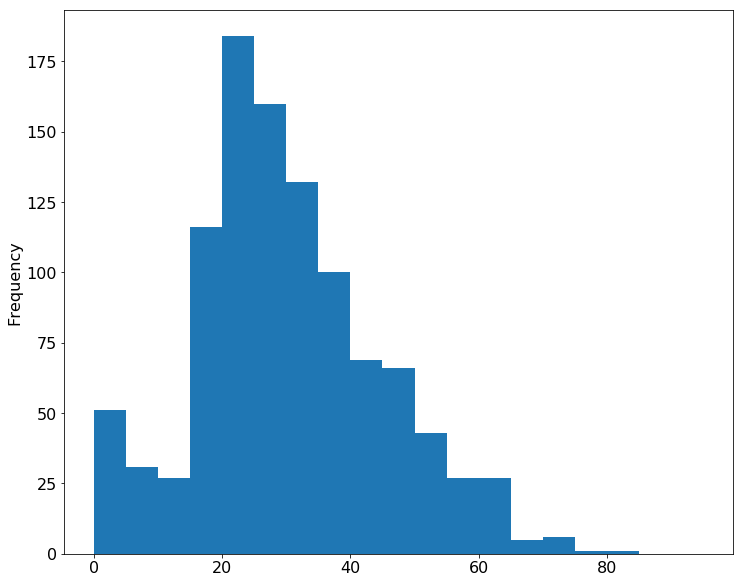

In [35]:
df['age'].plot.hist(bins=np.arange(0, 100, 5))

How many man and women where on the Titanic?

In [38]:
df.sex.value_counts() #.plot.barh()

male      843
female    466
Name: sex, dtype: int64

To get answers to more complicated questions, the `groupby` → `aggregate` workflow is very helpful

Percentages of survivors by sex:

In [39]:
df.groupby(['sex'])['survived'].mean()

sex
female    0.727468
male      0.190985
Name: survived, dtype: float64

DataFrames also know masks

In [40]:
df['child'] = df.age < 9

df[df.child].survived.mean(), df[~df.child].survived.mean()

(0.6388888888888888, 0.3670169765561843)

Grouping works with more than one column

In [41]:
df.groupby(['sex', 'child']).survived.agg(['mean', 'size'])

mean  size
sex    child                
female False  0.729167   432
       True   0.705882    34
male   False  0.172671   805
       True   0.578947    38

In [42]:
df.groupby(['sex', 'pclass']).survived.agg(['mean', 'size'])

mean  size
sex    pclass                
female 1       0.965278   144
       2       0.886792   106
       3       0.490741   216
male   1       0.340782   179
       2       0.146199   171
       3       0.152130   493

⇒ Women and children first worked (Also being rich helped)